# Importing necessary libraries

In [19]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings(action='ignore')

# nltk
import nltk
nltk.download('stopwords')

## Preprocessing libraries
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# For Model training
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Metrics for accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading our Dataset
## Dataset details
- target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

In [4]:
columns=["target", "ids", "date", "flag", "user", "text"]
df_read=pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='latin1',names=columns)
print(df_read.shape)
df_read.head()

(1600000, 6)


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Making a DataFrame out of the above Dataset with the only columns that are needed

In [5]:
data={'text':df_read['text'].values,'target':df_read['target'].values}
df=pd.DataFrame(data)
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


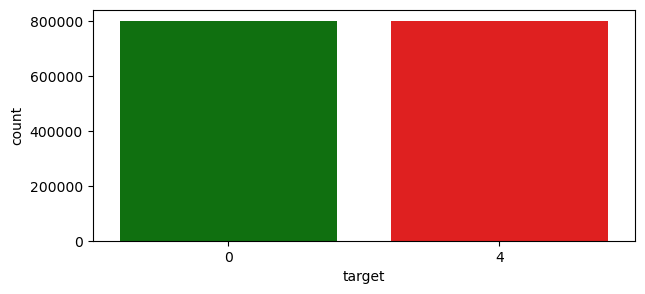

In [6]:
# Seeing the distribution of positive and negative tweet reviews in target column
plt.figure(figsize=(7,3))
sns.countplot(data=df,x='target',palette=['green','red'])
plt.show()

In [7]:
# Data clearing and preprocessing
corpus = []
ps=PorterStemmer()
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])         # Removing special characters from text(message)
    review = review.lower()                                  # Converting entire text into lower case
    review = review.split()                                  # Splitting our text into words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]             # Stemming and removing stopwords
    review = ' '.join(review)                                # Joining all the words into a comple text
    corpus.append(review)                                    # Appending each text into the list corpus

In [8]:
# Creating the Bag of Words model
cv = TfidfVectorizer()   # We can also select max features we want like this:- max_features = 1500
# We will use X as independent feature section
X = cv.fit_transform(corpus)
# We will use y as dependent feature section
y=df['target']

In [9]:
# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

## Model Training

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [18]:
# Training model using Naive bayes classifier
review_detect1 = MultinomialNB().fit(X_train, y_train)
y_pred1=review_detect1.predict(X_test)

In [20]:
# Training model using LogisticRegression
review_detect2 = LogisticRegression().fit(X_train, y_train)
y_pred2=review_detect2.predict(X_test)

In [21]:
# Checking the accuracy Naive bayes classifier
print("Confusion matrix : \n",confusion_matrix(y_pred1,y_test))
print("Accuracy score : ",accuracy_score(y_pred1,y_test))
print("Classification Report : ",classification_report(y_pred1,y_test))

Confusion matrix : 
 [[187448  64661]
 [ 52429 175462]]
Accuracy score :  0.7560625
Classification Report :                precision    recall  f1-score   support

           0       0.78      0.74      0.76    252109
           4       0.73      0.77      0.75    227891

    accuracy                           0.76    480000
   macro avg       0.76      0.76      0.76    480000
weighted avg       0.76      0.76      0.76    480000



In [22]:
# Checking the accuracy for Logistic Regression
print("Confusion matrix : \n",confusion_matrix(y_pred2,y_test))
print("Accuracy score : ",accuracy_score(y_pred2,y_test))
print("Classification Report : ",classification_report(y_pred2,y_test))

Confusion matrix : 
 [[179826  47215]
 [ 60051 192908]]
Accuracy score :  0.7765291666666667
Classification Report :                precision    recall  f1-score   support

           0       0.75      0.79      0.77    227041
           4       0.80      0.76      0.78    252959

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000



### NOTE :- We can see Logistic Regression has slight better prediction score

In [23]:
# Creating a pickle file for the Multinomial Naive Bayes model
pickle.dump(review_detect2, open('tweetmodel.pkl', 'wb'))